<a href="https://colab.research.google.com/github/gromdimon/code/blob/main/Regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Now we will building a Regression model with Random Forest regressor usig the data from Chembl specifically Beta Amyloid drug discovery.**

# Import data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

In [3]:
! wget https://github.com/gromdimon/Files/raw/main/dataset_with_padel_pIC50.csv

--2021-07-23 10:10:58--  https://github.com/gromdimon/Files/raw/main/dataset_with_padel_pIC50.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/gromdimon/Files/main/dataset_with_padel_pIC50.csv [following]
--2021-07-23 10:10:59--  https://raw.githubusercontent.com/gromdimon/Files/main/dataset_with_padel_pIC50.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1306639 (1.2M) [text/plain]
Saving to: ‘dataset_with_padel_pIC50.csv’

dataset_with_padel_ 100%[===================>]   1.25M  --.-KB/s    in 0.08s   

2021-07-23 10:10:59 (16.3 MB/s) - ‘dataset_with_padel_pIC50.csv’ saved [1306639/13066

In [4]:
# Download bioactivity data
bioactivity = pd.read_csv('dataset_with_padel_pIC50.csv')
bioactivity

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.301030
1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.568636
2,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.744727
3,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.958607
4,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.782516
724,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.903785
725,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.969805
726,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.813044


# Checking data before ML analysis

In [5]:
# Seeing information about dataframe
bioactivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 728 entries, 0 to 727
Columns: 882 entries, PubchemFP0 to pIC50
dtypes: float64(1), int64(881)
memory usage: 4.9 MB


In [22]:
# Feature from Vlad Yashin
def check_missing_values(dataframe):

  if dataframe.isnull().sum().sum() > 0:

    total = dataframe.isnull().sum().sort_values(ascending=False) 
    total_sum = total[total > 0]

    percent = dataframe.isnull().mean().sort_values(ascending=False) 
    percent_sum = percent[percent > 0] 

    missing_data = pd.concat([total_sum, percent_sum], axis=1, keys=['Total', 'Percent'])

    print(f'Total and Percentage of NaN:\n {missing_data}')

  else: 
    print('No NaN found.')

In [23]:
# Checking missing values
check_missing_values(bioactivity)

Total and Percentage of NaN:
        Total   Percent
pIC50      1  0.001374


In [24]:
# Finding where is NaN
bioactivity.columns[bioactivity.isna().any()]

Index(['pIC50'], dtype='object')

In [25]:
# Drop missing data entry + double check on missing values
bioactivity = bioactivity.dropna()
check_missing_values(bioactivity)

No NaN found.


In [27]:
# Looking on dataframe
bioactivity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 727 entries, 0 to 727
Columns: 882 entries, PubchemFP0 to pIC50
dtypes: float64(1), int64(881)
memory usage: 4.9 MB


# Preparing data for ML

In [29]:
# Making X and Y 
X = bioactivity.drop('pIC50', axis=1)
print(X.shape)

Y = bioactivity['pIC50']
print(Y.shape)

(727, 881)
(727,)


In [51]:
# Deleting meaningless columns
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.astype('int32')

array([[1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int32)

In [34]:
# Data split 80\20
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

# Building a regression model using Random Forest

In [46]:
# Launching regression model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.7070132961646531

In [47]:
# Trying to predict value with test
Y_pred = model.predict(X_test)
Y_pred

array([7.22254858, 6.62000478, 4.98698539, 7.12878894, 5.38357059,
       6.24962704, 7.31987432, 4.17573912, 6.6374462 , 7.31987432,
       5.11310087, 5.07095542, 7.44544587, 5.55195975, 4.88450053,
       5.78839282, 6.94667068, 6.26348372, 6.41262116, 5.03999584,
       7.74811064, 7.6731517 , 4.94483024, 4.18752405, 5.29683022,
       7.49544557, 7.3510929 , 5.27628812, 5.03032596, 6.05285413,
       6.15906586, 8.23000248, 7.46689606, 6.61090445, 6.52001707,
       4.67811675, 7.2385964 , 6.52115894, 4.61821307, 4.90668292,
       4.4569856 , 6.7670304 , 5.2061761 , 5.82832264, 7.6731517 ,
       7.39765419, 6.83867021, 6.83476077, 5.21187001, 5.06211305,
       4.68441157, 4.53924977, 5.80775837, 6.85201175, 5.72806618,
       3.70588477, 5.20241544, 6.32716553, 7.41091729, 5.10285524,
       7.65165643, 7.20663114, 5.72120518, 5.64956045, 6.62597975,
       5.60016247, 8.70484857, 6.51984134, 5.83291935, 4.97710322,
       5.83748093, 5.16045061, 4.82922143, 5.50917062, 5.33770

# Evaluate model performance

In [48]:
# Calculate the absolute errors
errors = abs(Y_pred - Y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.57 degrees.


In [49]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)

# Accuracy of the model
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 90.18 %.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

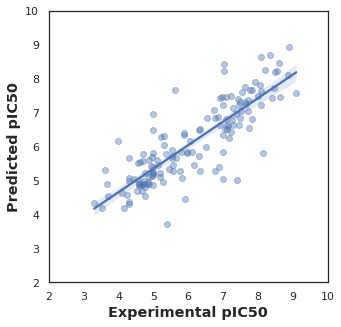

In [59]:
# Visualising model performance
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(2, 10)
ax.set_ylim(2, 10)
ax.figure.set_size_inches(5, 5)
plt.show

# Predicting pIC50 for other drugs

In [50]:
# Testing model with random Pubchems
entry = np.random.randint(0,2,183)
print("Random test entry:", entry)

#entry = pd.read_csv('....')

entry_pred = model.predict([entry])
print("pIC50 prediction", entry_pred)

Random test entry: [0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1
 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0 0 0 0
 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0
 0 1 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 0
 1 1 0 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1]
pIC50 prediction [5.96794921]
